In [1]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv(r'C:\Users\arsha\Downloads\ML\Datasets\customer (1).csv').drop(columns=['age', 'gender'])
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


Ordinal Encoding


In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=0.2)

In [12]:
X_train.head()

,review,education
44,Average,UG
10,Good,UG
36,Good,UG
41,Good,PG
49,Good,UG


In [13]:
oe = OrdinalEncoder(categories=[['Poor', 'Average', 'Good'],['School', 'UG', 'PG']])

In [14]:
X_train = oe.fit_transform(X_train)
X_test = oe.transform(X_test)

In [16]:
X_train[:10]

array([[1., 1.],
       [2., 1.],
       [2., 1.],
       [2., 2.],
       [2., 1.],
       [0., 1.],
       [1., 0.],
       [2., 2.],
       [1., 2.],
       [0., 2.]])

In [19]:
oe.categories

[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']]

In [21]:
oe.feature_names_in_

array(['review', 'education'], dtype=object)

In [22]:
oe.n_features_in_

2

In [26]:
oe.inverse_transform(np.array([0,2]).reshape(1,2))

array([['Poor', 'PG']], dtype=object)

In [24]:
oe.get_feature_names_out()

array(['review', 'education'], dtype=object)

Handle Unknown

In [28]:
oe.transform(np.array(['Poor', 'College']).reshape(1,2))

c:\Users\arsha\Downloads\ML\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


ValueError: Found unknown categories [np.str_('College')] in column 1 during transform

Set Unknown value

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=0.2)

oe = OrdinalEncoder(categories=[['Poor', 'Average', 'Good'],['School', 'UG', 'PG']], handle_unknown='use_encoded_value',unknown_value=-1)
X_train = oe.fit_transform(X_train)
oe.transform(np.array(['Poor', 'College']).reshape(1,2))

c:\Users\arsha\Downloads\ML\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[ 0., -1.]])

Handling infrequent (Rare Categories)

In [32]:
X = np.array([['dog'] * 5 + ['cat'] * 20 + ['rabbit'] * 10 +['snake'] * 3 + ['horse'] * 2], dtype=object).T
X.ravel()

array(['dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'rabbit',
       'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit', 'rabbit',
       'rabbit', 'rabbit', 'rabbit', 'snake', 'snake', 'snake', 'horse',
       'horse'], dtype=object)

In [33]:
enc = OrdinalEncoder(max_categories=3).fit(X)

In [34]:
enc.infrequent_categories_

[array(['dog', 'horse', 'snake'], dtype=object)]

In [35]:
enc.transform(np.array([['cat','rabbit','snake','dog']]).reshape(4,1))

array([[0.],
       [1.],
       [2.],
       [2.]])

In [36]:
enc = OrdinalEncoder(min_frequency = 4).fit(X)
enc.infrequent_categories_

[array(['horse', 'snake'], dtype=object)]

In [37]:
enc.transform(np.array([['cat','rabbit','snake','dog','horse']]).reshape(5,1))

array([[0.],
       [2.],
       [3.],
       [1.],
       [3.]])

Handling Missing values while encoding

In [41]:
data = np.array(['Cat', np.nan, 'Dog', 'Fish', np.nan]).reshape(5,1)
data

array([['Cat'],
       ['nan'],
       ['Dog'],
       ['Fish'],
       ['nan']], dtype='<U32')

In [42]:
enc = OrdinalEncoder(encoded_missing_value=-1)
encoded_data = enc.fit_transform(data)
encoded_data

array([[0.],
       [3.],
       [1.],
       [2.],
       [3.]])

### Label Encoder

In [43]:
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [44]:
from sklearn.preprocessing import LabelEncoder
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=0.2)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [45]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [46]:
le.inverse_transform(np.array([1,1,0]))

array(['Yes', 'Yes', 'No'], dtype=object)

### One Hot Encoder

In [91]:
cars = pd.read_csv(r'C:\Users\arsha\Downloads\ML\Datasets\cars.csv')
cars.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [92]:
X = cars.iloc[:,0:3:2]
y = cars.iloc[:,-1]

In [93]:
X

,brand,fuel
0,Maruti,Diesel
1,Skoda,Diesel
2,Honda,Petrol
3,Hyundai,Diesel
4,Maruti,Petrol
...,...,...
8123,Hyundai,Petrol
8124,Hyundai,Diesel
8125,Maruti,Diesel
8126,Tata,Diesel


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
ohe = OneHotEncoder(sparse_output=False, dtype=np.int32)

In [105]:
ohe.fit_transform(X_train)

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

In [106]:
X_train = ohe.fit_transform(X_train)

In [107]:
ohe.categories_

[array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
        'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
        'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
        'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
        'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object),
 array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object)]

In [108]:
ohe.feature_names_in_

array(['brand', 'fuel'], dtype=object)

In [109]:
ohe.n_features_in_

2

In [113]:
ohe.get_feature_names_out()

array(['brand_Ambassador', 'brand_Ashok', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia',
       'brand_Land', 'brand_Lexus', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mitsubishi',
       'brand_Nissan', 'brand_Opel', 'brand_Peugeot', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol'], dtype=object)

In [112]:
len(ohe.get_feature_names_out())

36

Form Dataframe again if required

In [111]:
pd.DataFrame(X_train,columns=ohe.get_feature_names_out())

,brand_Ambassador,brand_Ashok,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,...,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [116]:
ohe.inverse_transform(np.array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1]).reshape(1,36))

array([['Audi', 'Petrol']], dtype=object)

Dummy Variable Trap

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

ohe = OneHotEncoder(drop='first', sparse_output = False)
ohe.fit_transform(X_train).shape

(6502, 34)

In [124]:
ohe.drop_idx_

array([0, 0], dtype=object)

Handling Rare Categories

<Axes: xlabel='brand'>

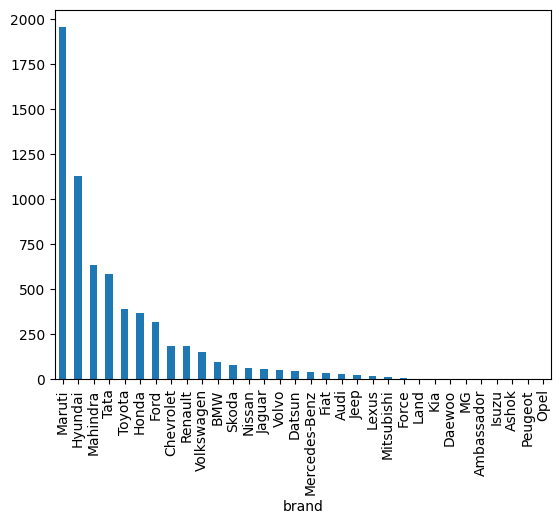

In [129]:
X_train.brand.value_counts().plot(kind = 'bar')

<Axes: xlabel='fuel'>

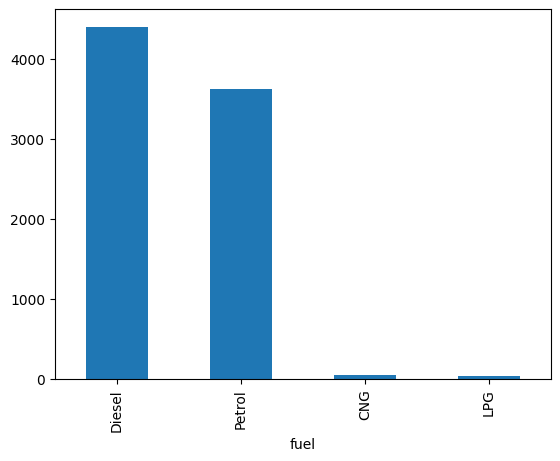

In [130]:
cars.fuel.value_counts().plot(kind = 'bar')

Handle the above using min_frequency

In [131]:
ohe = OneHotEncoder(sparse_output = False, min_frequency = 100)
ohe.fit_transform(X_train).shape

(6502, 14)

In [133]:
ohe.get_feature_names_out()

array(['brand_Chevrolet', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Mahindra', 'brand_Maruti', 'brand_Renault', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_infrequent_sklearn',
       'fuel_Diesel', 'fuel_Petrol', 'fuel_infrequent_sklearn'],
      dtype=object)

Can also be done using max_categories

In [134]:
ohe = OneHotEncoder(sparse_output = False, max_categories=15)
ohe.fit_transform(X_train).shape

(6502, 19)

In [135]:
ohe.get_feature_names_out()

array(['brand_BMW', 'brand_Chevrolet', 'brand_Ford', 'brand_Honda',
       'brand_Hyundai', 'brand_Jaguar', 'brand_Mahindra', 'brand_Maruti',
       'brand_Nissan', 'brand_Renault', 'brand_Skoda', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen', 'brand_infrequent_sklearn',
       'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol'], dtype=object)

Handling Unknown Categories

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

ohe = OneHotEncoder(drop='first',sparse_output=False)
ohe.fit_transform(X_train)

ohe.transform(np.array(['local','Petrol']).reshape(1,2))

c:\Users\arsha\Downloads\ML\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


ValueError: Found unknown categories [np.str_('local')] in column 0 during transform

In [137]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit_transform(X_train)

ohe.transform(np.array(['local','Petrol']).reshape(1,2))

c:\Users\arsha\Downloads\ML\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]])

In [138]:
ohe.inverse_transform(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]).reshape(1,36))

array([[None, 'Petrol']], dtype=object)

### Label Binarizer

Used for multilabel or multiclass problems (only on output cols)

In [139]:
from sklearn.preprocessing import LabelBinarizer

# Sample target variable for a multi-class classification problem
y = ['cat', 'dog', 'fish', 'dog', 'cat']

lb = LabelBinarizer()
y_binarized = lb.fit_transform(y)

print("Binarized labels:\n", y_binarized)

# Inverse transform to recover original labels
y_original = lb.inverse_transform(y_binarized)
print("Original labels:\n", y_original)

Binarized labels:
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]
Original labels:
 ['cat' 'dog' 'fish' 'dog' 'cat']


In [140]:
from sklearn.preprocessing import MultiLabelBinarizer

# Example multi-label data
y = [('red', 'blue'), ('blue', 'green'), ('green',), ('red',)]

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(y)

print("Binary matrix:\n", Y)
print("Class labels:", mlb.classes_)

# Inverse transform to recover original labels
y_inv = mlb.inverse_transform(Y)
print("Inverse transformed labels:", y_inv)

Binary matrix:
 [[1 0 1]
 [1 1 0]
 [0 1 0]
 [0 0 1]]
Class labels: ['blue' 'green' 'red']
Inverse transformed labels: [('blue', 'red'), ('blue', 'green'), ('green',), ('red',)]
